In [11]:
import sys
sys.path.append("..")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl

In [12]:
with open("./exp_log/3_in_parser.txt", "r") as f:
    lines = f.readlines()

In [13]:
ppl = []
for l in lines:
    if "| End of training |" in l:
        ppl.append(float(l.strip().split("|")[-2].strip()[-6:].strip()))

In [14]:
len(ppl)

35

In [15]:
p = [] 
r = []
f1 = []
for l in lines:
    if l.startswith("Mean Prec:"):
        p.append(float(l.strip().split(":")[1].strip()[:6]))
        r.append(float(l.strip().split(":")[2].strip()[:6]))
        f1.append(float(l.strip().split(":")[-1].strip()))

In [16]:
len(p), len(r), len(f1)

(35, 35, 35)

In [17]:
uas = []
uuas = []
for l in lines:
    if l.startswith("DDA:"):
        uas.append(float(l.strip().split(":")[-1].strip()))
    if l.startswith("UDA:"):
        uuas.append(float(l.strip().split(":")[-1].strip()))

In [18]:
len(uas), len(uuas)

(35, 35)

In [19]:
a = [0]*5
a.extend(['1']*5)
a.extend(['2']*5)
a.extend(['3']*5)
a.extend(['4']*5)
a.extend(['5']*5)
a.extend(['6']*5)
a.extend(['7']*5)

In [20]:
len(a)

40

In [21]:
ppl0 = [64.79, 66.22, 66.94, 64.59, 66.73]
p0 = [0.4675, 0.4788, 0.4489, 0.4321, 0.4480]
r0 = [0.6434, 0.6572, 0.6176, 0.5959, 0.6171]
f10 = [0.5332, 0.5455, 0.5116, 0.4927, 0.5108]
uas0 = [0.438, 0.453, 0.430, 0.271, 0.277]
uuas0 = [0.594, 0.606, 0.580, 0.466, 0.478]

In [22]:
ppl0.extend(ppl)
p0.extend(p)
r0.extend(r)
f10.extend(f1)
uas0.extend(uas)
uuas0.extend(uuas)

In [23]:
df = pd.DataFrame({"pos": a, "ppl": ppl0, "p": p0, "r": r0, "f1": f10, "uas": uas0, "uuas": uuas0})

In [24]:
df['p'] = df['p']*100
df['r'] = df['r']*100
df['f1'] = df['f1']*100
df['uas'] = df['uas']*100
df['uuas'] = df['uuas']*100

In [25]:
df.groupby("pos").max()

,ppl,p,r,f1,uas,uuas
pos,,,,,,
0,66.94,47.88,65.72,54.55,45.3,60.6
1,67.32,44.36,61.14,50.58,42.1,59.7
2,66.02,42.23,58.20,48.13,43.6,59.8
3,63.74,51.36,70.43,58.53,43.6,58.9
4,65.49,50.77,69.64,57.87,38.8,50.1
5,64.35,51.12,70.13,58.28,42.5,56.7
6,66.27,49.11,67.39,55.97,42.6,57.5
7,66.81,48.14,66.17,54.88,41.9,57.3


In [26]:
df.groupby("pos").min()

,ppl,p,r,f1,uas,uuas
pos,,,,,,
0,64.59,43.21,59.59,49.27,27.1,46.6
1,63.67,42.05,57.94,47.91,37.9,53.0
2,61.61,35.68,49.22,40.61,39.4,52.6
3,62.00,31.47,43.43,35.75,5.1,31.6
4,61.84,35.23,48.65,40.10,6.5,31.4
5,61.41,39.20,54.14,44.67,6.8,33.9
6,61.22,42.32,58.36,48.25,6.5,33.4
7,62.83,38.62,53.33,44.01,7.8,34.6


In [27]:
df.groupby("pos").median()

,ppl,p,r,f1,uas,uuas
pos,,,,,,
0,66.22,44.89,61.76,51.16,43.0,58.0
1,65.17,43.39,59.78,49.46,40.2,58.0
2,62.88,39.53,54.51,45.03,42.3,55.8
3,62.05,45.60,62.83,52.01,40.0,53.4
4,62.99,47.64,65.47,54.31,7.2,33.6
5,62.65,42.73,58.98,48.73,40.6,53.1
6,63.42,43.34,59.71,49.40,40.9,54.5
7,63.72,47.33,65.10,53.97,8.5,35.2


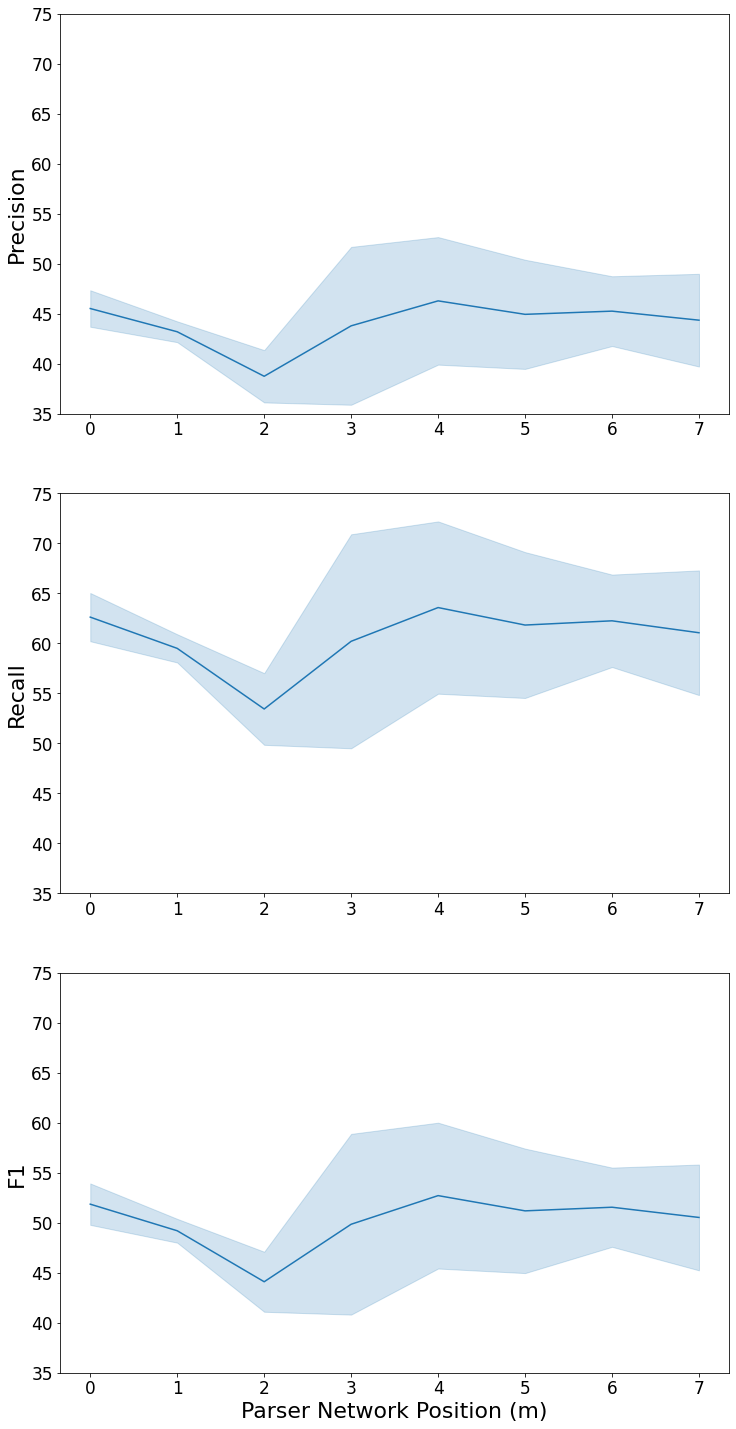

In [28]:
fig = plt.figure(figsize=(12,25))
plt.rcParams.update({'font.size': 17})

ax = fig.add_subplot(3, 1, 1)
sns.lineplot(data=df, x="pos", y="p", ci="sd")
plt.xlabel("", fontsize=22)
plt.ylabel("Precision", fontsize=22)
ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.0f'))
ax.set_ylim(35, 75)

ax = fig.add_subplot(3, 1, 2)
sns.lineplot(data=df, x="pos", y="r", ci="sd")
plt.xlabel("", fontsize=22)
plt.ylabel("Recall",fontsize=22)
ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.0f'))
ax.set_ylim(35, 75)

ax = fig.add_subplot(3, 1, 3)
sns.lineplot(data=df, x="pos", y="f1", ci="sd")
plt.xlabel("Parser Network Position (m)", fontsize=22)
plt.ylabel("F1", fontsize=22)
ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.0f'))
ax.set_ylim(35, 75)

plt.show()

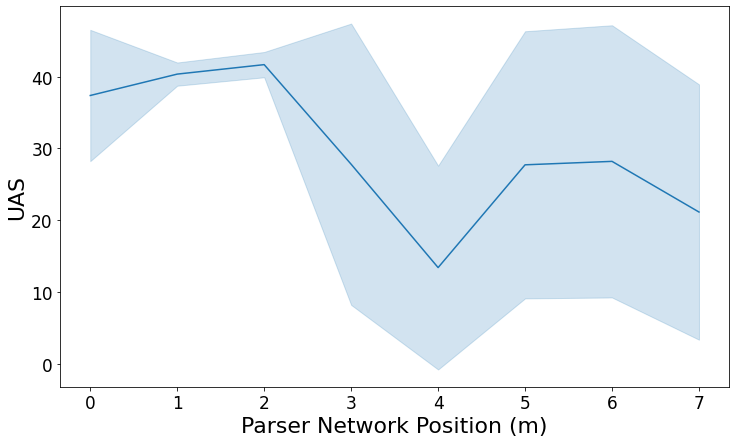

In [29]:
fig = plt.figure(figsize=(12,7))
plt.rcParams.update({'font.size': 17})
sns.lineplot(data=df, x="pos", y="uas", ci="sd")
plt.xlabel("Parser Network Position (m)", fontsize=22)
plt.ylabel("UAS", fontsize=22)
#plt.title("D")
plt.show()

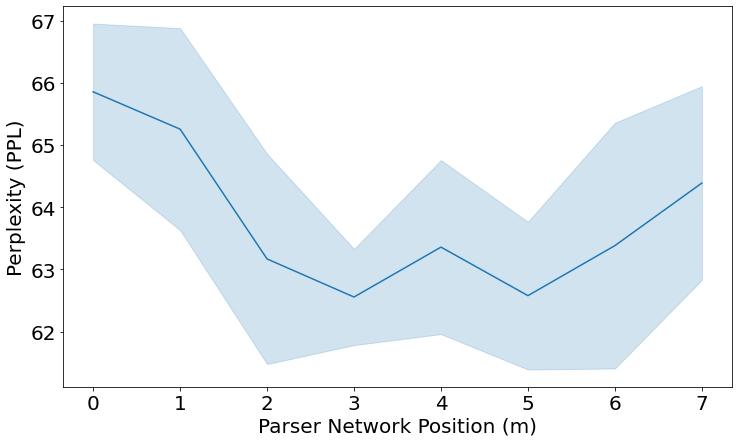

In [30]:
fig = plt.figure(figsize=(12,7))
plt.rcParams.update({'font.size': 20})
sns.lineplot(data=df, x="pos", y="ppl", ci="sd")
plt.xlabel("Parser Network Position (m)")
plt.ylabel("Perplexity (PPL)")
#plt.title("D")
plt.show()

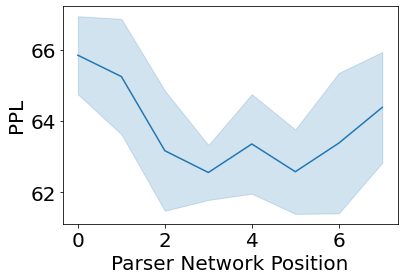

In [31]:
#plt.figure(figsize=(8,5))
sns.lineplot(data=df, x="pos", y="ppl", ci="sd")

plt.xlabel("Parser Network Position")
plt.ylabel("PPL")
plt.show()

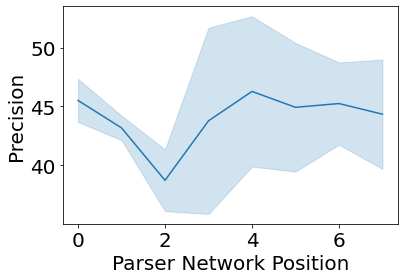

In [32]:
#plt.figure(figsize=(8,5))
sns.lineplot(data=df, x="pos", y="p", ci="sd")

plt.xlabel("Parser Network Position")
plt.ylabel("Precision")
plt.show()

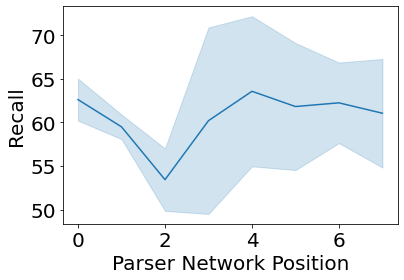

In [33]:
#plt.figure(figsize=(8,5))
sns.lineplot(data=df, x="pos", y="r", ci="sd")

plt.xlabel("Parser Network Position")
plt.ylabel("Recall")
plt.show()

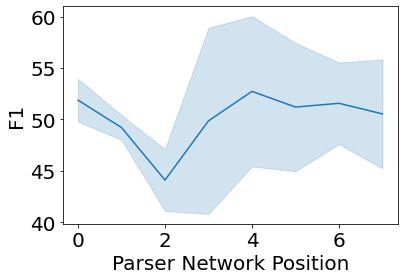

In [34]:
#plt.figure(figsize=(8,5))
sns.lineplot(data=df, x="pos", y="f1", ci="sd")

plt.xlabel("Parser Network Position")
plt.ylabel("F1")
plt.show()

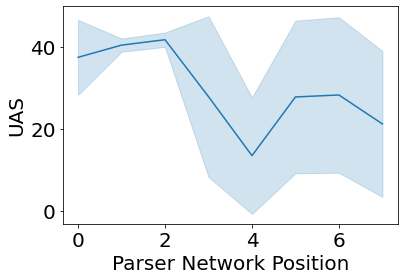

In [35]:
#plt.figure(figsize=(8,5))
sns.lineplot(data=df, x="pos", y="uas", ci="sd")

plt.xlabel("Parser Network Position")
plt.ylabel("UAS")
plt.show()

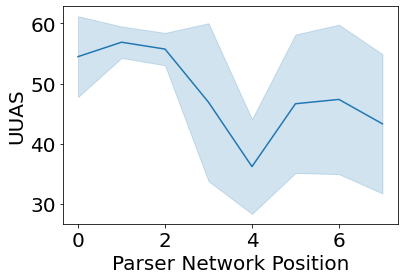

In [36]:
#plt.figure(figsize=(8,5))
sns.lineplot(data=df, x="pos", y="uuas", ci="sd")

plt.xlabel("Parser Network Position")
plt.ylabel("UUAS")
plt.show()